# Importing Libraries and Dataste

In [5]:
!pip install imblearn


In [6]:
!pip install -U scikit-learn imbalanced-learn
!pip install -U imbalanced-learn

In [7]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.svm import SVC
from IPython.display import display
from imblearn.over_sampling import SMOTE
from collections import Counter

In [8]:
# Importing dataset
df = pd.read_excel("dataset.xlsx")

In [9]:
df

,Sexe,Decision,Age,Etio,CV,Esterman,ST,DT_centrale,DT_laterales,DT_quadsupg,...,DT_dis_quadsupd,DT_dis_quadinfg,DT_dis_quadinfd,DT_dis_Gauche,DT_dis_Droite,Resultat ST,Resultat DT Central,Résultat DT latéral,Resultat Dis_Centrale,Resultat dis_laterales
0,F,Non,33,Vas,HLH_D,45,0,3,36,3,...,12,10,17.0,20,29,1,1,0,1,0
1,F,Oui,40,Vas,HLH_D,48,1,3,2,0,...,2,4,5.0,5,7,1,1,1,0,1
2,H,Simulateur,52,Tum,HLH_D,42,0,3,14,1,...,3,5,10.0,8,13,1,1,0,1,0
3,H,Non,37,Vas,HLH_D,40,1,1,19,1,...,11,6,10.0,8,21,1,1,0,1,0
4,H,Non,39,TC,HLH_G,47,0,1,23,13,...,1,10,1.0,17,2,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,H,Oui,55,Vas,Scotome_D,1,1,4,1,1,...,0,1,1.0,1,1,1,1,1,1,1
250,F,Non,66,Tum,Scotome_G,0,0,1,3,1,...,4,6,6.0,10,10,1,1,1,1,0
251,H,Oui,46,Vas,Scotome_G,1,0,2,3,2,...,0,1,0.0,2,0,1,1,1,1,1
252,F,Non,63,Vas,Scotome_G,27,1,2,8,8,...,1,4,3.0,9,4,1,1,0,1,0


In [10]:
df.columns

Index(['Sexe', 'Decision', 'Age', 'Etio', 'CV', 'Esterman', 'ST',
       'DT_centrale', 'DT_laterales', 'DT_quadsupg', 'DT_quadsupd',
       'DT_quadinfg', 'DT_quadinfd', 'DT_Gauche', 'DT_Droite',
       'DT_dis_Centrale', 'DT_dis_laterales', 'DT_dis_quadsupg',
       'DT_dis_quadsupd', 'DT_dis_quadinfg', 'DT_dis_quadinfd',
       'DT_dis_Gauche', 'DT_dis_Droite', 'Resultat ST', 'Resultat DT Central',
       'Résultat DT latéral', 'Resultat Dis_Centrale',
       'Resultat dis_laterales'],
      dtype='object')

# Data Pre-processing

In [11]:
df.describe()

,Age,Esterman,ST,DT_centrale,DT_laterales,DT_quadsupg,DT_quadsupd,DT_quadinfg,DT_quadinfd,DT_Gauche,...,DT_dis_quadsupd,DT_dis_quadinfg,DT_dis_quadinfd,DT_dis_Gauche,DT_dis_Droite,Resultat ST,Resultat DT Central,Résultat DT latéral,Resultat Dis_Centrale,Resultat dis_laterales
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,...,254.000000,254.000000,253.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000
mean,50.031496,13.854331,0.688976,4.039370,10.023622,2.649606,2.488189,2.492126,2.330709,5.141732,...,4.318898,5.173228,5.102767,9.842520,9.401575,0.944882,0.913386,0.535433,0.783465,0.460630
std,15.629068,15.932864,0.941845,3.655959,10.472599,4.010764,3.704214,4.198383,4.349467,7.232693,...,4.428246,4.584894,5.041624,8.450671,8.665282,0.228661,0.281824,0.499728,0.412696,0.499432
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,50.000000,8.000000,0.000000,3.000000,6.500000,1.000000,1.000000,1.000000,0.000000,2.500000,...,2.500000,4.000000,3.000000,7.000000,7.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,62.000000,23.000000,1.000000,5.000000,14.000000,3.000000,3.000000,3.000000,2.000000,6.000000,...,7.000000,8.000000,8.000000,16.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,85.000000,71.000000,5.000000,23.000000,52.000000,18.000000,17.000000,18.000000,18.000000,36.000000,...,18.000000,18.000000,18.000000,36.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sexe                    254 non-null    object 
 1   Decision                244 non-null    object 
 2   Age                     254 non-null    int64  
 3   Etio                    254 non-null    object 
 4   CV                      254 non-null    object 
 5   Esterman                254 non-null    int64  
 6   ST                      254 non-null    int64  
 7   DT_centrale             254 non-null    int64  
 8   DT_laterales            254 non-null    int64  
 9   DT_quadsupg             254 non-null    int64  
 10  DT_quadsupd             254 non-null    int64  
 11  DT_quadinfg             254 non-null    int64  
 12  DT_quadinfd             254 non-null    int64  
 13  DT_Gauche               254 non-null    int64  
 14  DT_Droite               254 non-null    in

In [13]:
df.Decision.value_counts()

Non           128
Oui            91
Simulateur     25
Name: Decision, dtype: int64

In [14]:
## Checking for NaN or Null values in the dataset
nan_col_vals = df.isnull().sum()

In [15]:
# Counting NaN values for each column
nan_col_vals

Sexe                       0
Decision                  10
Age                        0
Etio                       0
CV                         0
Esterman                   0
ST                         0
DT_centrale                0
DT_laterales               0
DT_quadsupg                0
DT_quadsupd                0
DT_quadinfg                0
DT_quadinfd                0
DT_Gauche                  0
DT_Droite                  0
DT_dis_Centrale            0
DT_dis_laterales           0
DT_dis_quadsupg            0
DT_dis_quadsupd            0
DT_dis_quadinfg            0
DT_dis_quadinfd            1
DT_dis_Gauche              0
DT_dis_Droite              0
Resultat ST                0
Resultat DT Central        0
Résultat DT latéral        0
Resultat Dis_Centrale      0
Resultat dis_laterales     0
dtype: int64

In [16]:
df.loc[ df.DT_dis_quadinfd.isna() ]

,Sexe,Decision,Age,Etio,CV,Esterman,ST,DT_centrale,DT_laterales,DT_quadsupg,...,DT_dis_quadsupd,DT_dis_quadinfg,DT_dis_quadinfd,DT_dis_Gauche,DT_dis_Droite,Resultat ST,Resultat DT Central,Résultat DT latéral,Resultat Dis_Centrale,Resultat dis_laterales
119,F,Oui,68,Vas,N,0,0,4,1,0,...,1,2,NaN,4,1,1,1,1,1,1


In [17]:
# At the moment, let's consider dropping all the lines with NaN vals
df.dropna(inplace = True)
df.reset_index(drop=True, inplace=True)

In [18]:
df.isna().sum()

Sexe                      0
Decision                  0
Age                       0
Etio                      0
CV                        0
Esterman                  0
ST                        0
DT_centrale               0
DT_laterales              0
DT_quadsupg               0
DT_quadsupd               0
DT_quadinfg               0
DT_quadinfd               0
DT_Gauche                 0
DT_Droite                 0
DT_dis_Centrale           0
DT_dis_laterales          0
DT_dis_quadsupg           0
DT_dis_quadsupd           0
DT_dis_quadinfg           0
DT_dis_quadinfd           0
DT_dis_Gauche             0
DT_dis_Droite             0
Resultat ST               0
Resultat DT Central       0
Résultat DT latéral       0
Resultat Dis_Centrale     0
Resultat dis_laterales    0
dtype: int64

In [19]:
# Listing all the columns in the dataframe
df.columns

Index(['Sexe', 'Decision', 'Age', 'Etio', 'CV', 'Esterman', 'ST',
       'DT_centrale', 'DT_laterales', 'DT_quadsupg', 'DT_quadsupd',
       'DT_quadinfg', 'DT_quadinfd', 'DT_Gauche', 'DT_Droite',
       'DT_dis_Centrale', 'DT_dis_laterales', 'DT_dis_quadsupg',
       'DT_dis_quadsupd', 'DT_dis_quadinfg', 'DT_dis_quadinfd',
       'DT_dis_Gauche', 'DT_dis_Droite', 'Resultat ST', 'Resultat DT Central',
       'Résultat DT latéral', 'Resultat Dis_Centrale',
       'Resultat dis_laterales'],
      dtype='object')

In [20]:
'''
    There is a problem with the values of some categorical features where a charcter '\xa0' is added to the end of them!
    Example: Etio column
'''
# Etio column
df.Etio.value_counts()

Vas        160
TC          41
Tum         27
Vas          6
TC_Vas       4
TC           3
Tum          1
Vas_Tum      1
Name: Etio, dtype: int64

In [21]:
'''
    We solve this for all the values in the columns of the dataset as follows:
'''
df.replace(u'\xa0', u'', regex=True, inplace = True)

In [22]:
# Etio Column after removing the character '\xa0'
df.Etio.value_counts()

Vas        166
TC          44
Tum         28
TC_Vas       4
Vas_Tum      1
Name: Etio, dtype: int64

In [23]:
# CV Column
df.CV.value_counts()

N               111
HLH_D            21
HLH_G            21
Quadra_inf_D     20
Quadra_sup_D     19
Quadra_sup_G     17
Scotome_D        12
Quadra_inf_G     11
Scotome_G         9
Quadra sup D      1
Scotomel_G        1
Name: CV, dtype: int64

In [24]:
# Fixing the problem with some categories of CV column
df.loc[ (df.CV == 'Scotomel_G'), 'CV'] = 'Scotome_G'
df.loc[ (df.CV == 'Quadra sup D'), 'CV'] = 'Quadra_sup_D'

In [25]:
df.loc[ df.CV == 'Quadra sup D' ].CV

Series([], Name: CV, dtype: object)

In [26]:
# CV Column
df.CV.value_counts()

N               111
HLH_D            21
HLH_G            21
Quadra_inf_D     20
Quadra_sup_D     20
Quadra_sup_G     17
Scotome_D        12
Quadra_inf_G     11
Scotome_G        10
Name: CV, dtype: int64

In [27]:
# Sexe Column
df.Sexe.value_counts()

H    145
F     98
Name: Sexe, dtype: int64

array([<Axes: title={'center': 'F'}>, <Axes: title={'center': 'H'}>],
      dtype=object)

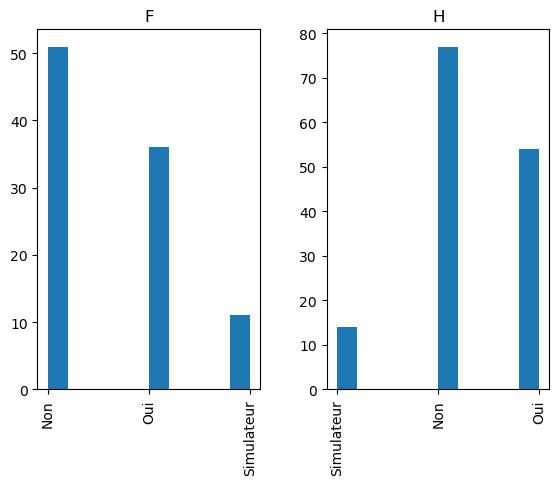

In [28]:
df.Decision.hist(by = df.Sexe)

In [29]:
# Decision Column
df.Decision.value_counts()

Non           128
Oui            90
Simulateur     25
Name: Decision, dtype: int64

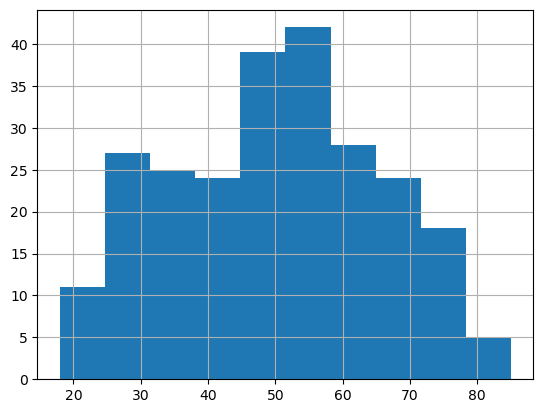

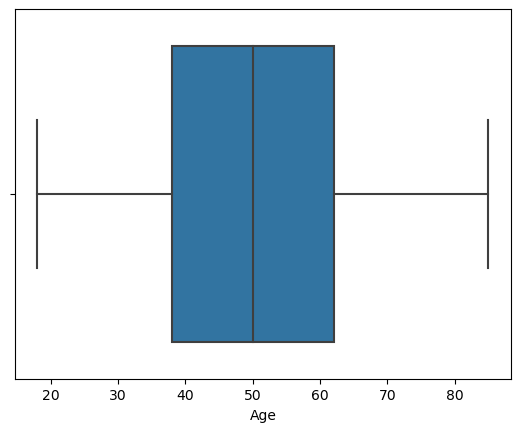

In [30]:
# Age Column
df.Age.hist()
plt.show()
sns.boxplot(x = df.Age)
plt.show()

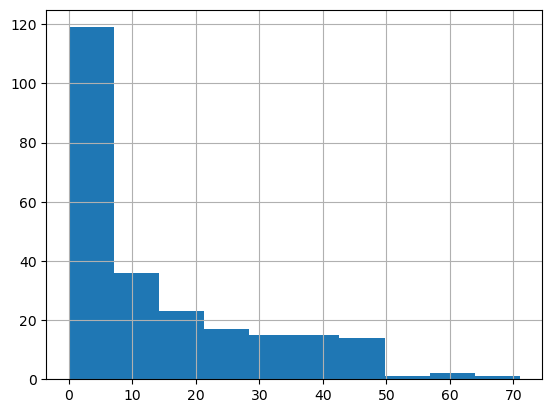

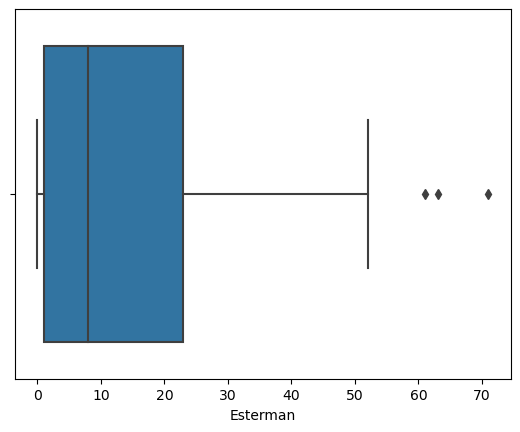

In [31]:
# Esterman Column
df.Esterman.hist()
plt.show()
sns.boxplot(x = df.Esterman)
plt.show()

In [32]:
# ST Column
df.ST.value_counts()

0    131
1     77
2     22
3     10
5      2
4      1
Name: ST, dtype: int64

<Axes: >

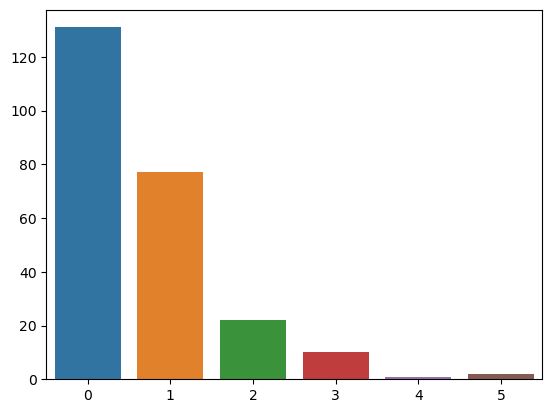

In [33]:
# ST Column
sns.barplot(x = df.ST.value_counts().index, y = df.ST.value_counts().values)

<Axes: >

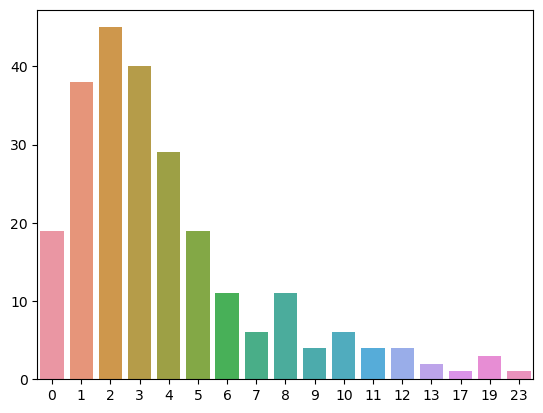

In [34]:
# DT_centrale Column
sns.barplot(x = df.DT_centrale.value_counts().index, y = df.DT_centrale.value_counts().values)

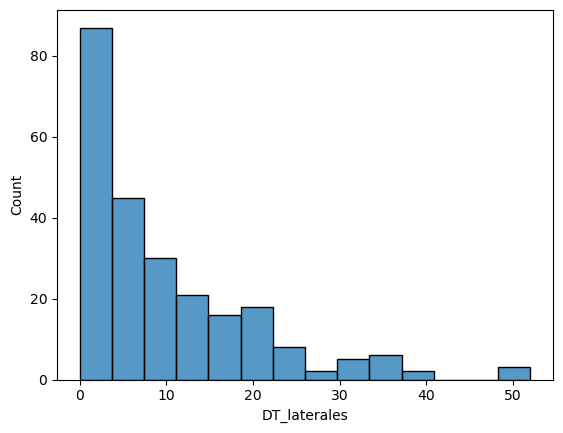

In [35]:
# DT_laterales Column
sns.histplot(df.DT_laterales)
plt.show()

Histogram plot:  DT_quadsupg


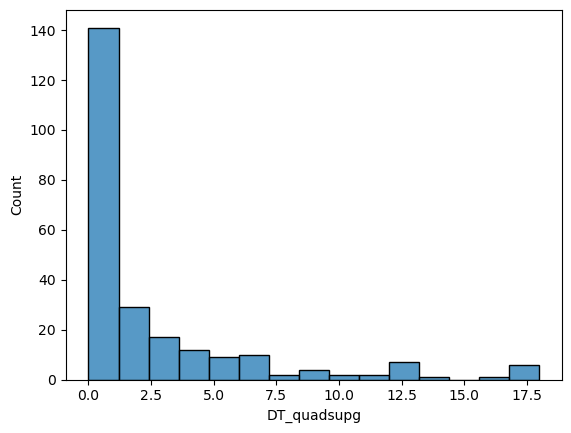

Histogram plot:  DT_quadsupd


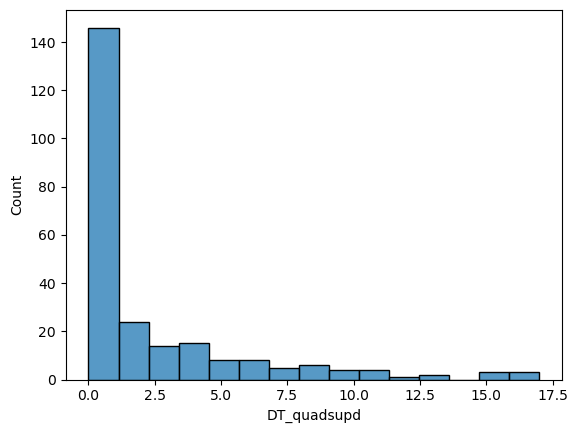

Histogram plot:  DT_quadinfg


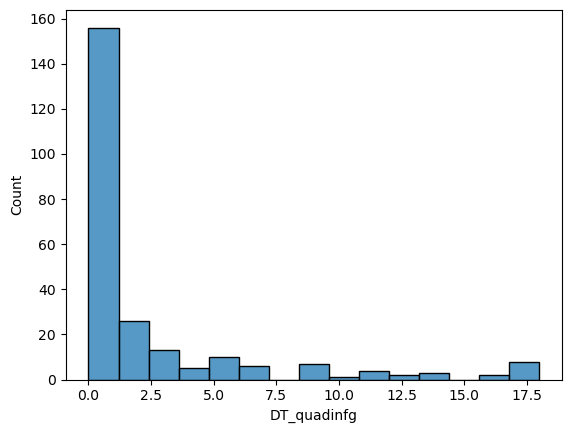

Histogram plot:  DT_quadinfd


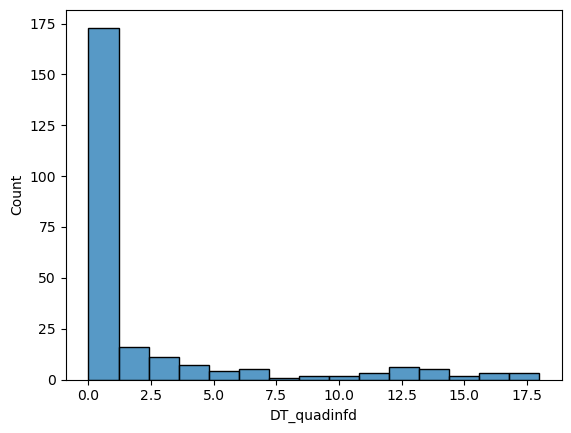

Histogram plot:  DT_Gauche


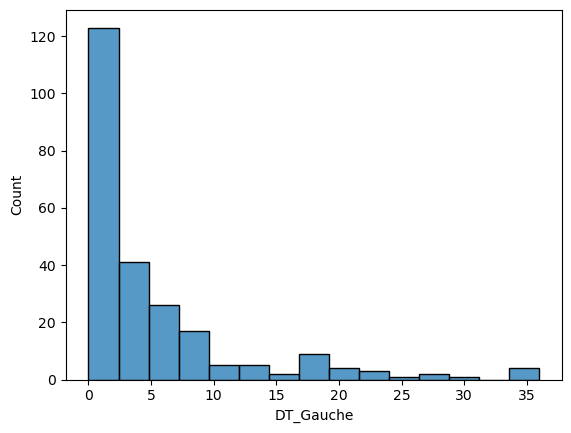

Histogram plot:  DT_Droite


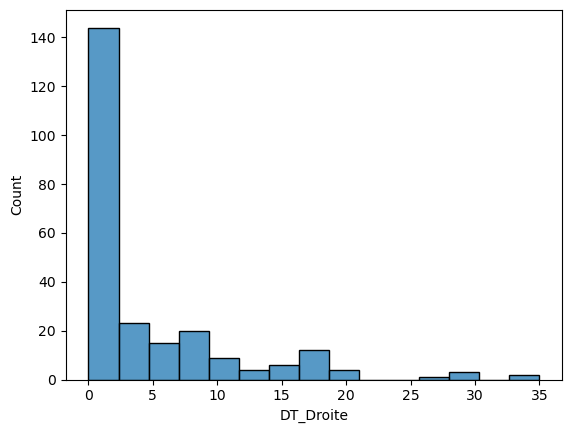

Histogram plot:  DT_dis_Centrale


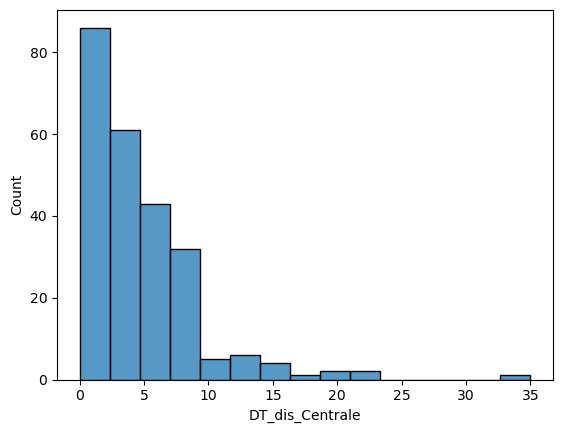

Histogram plot:  DT_dis_laterales


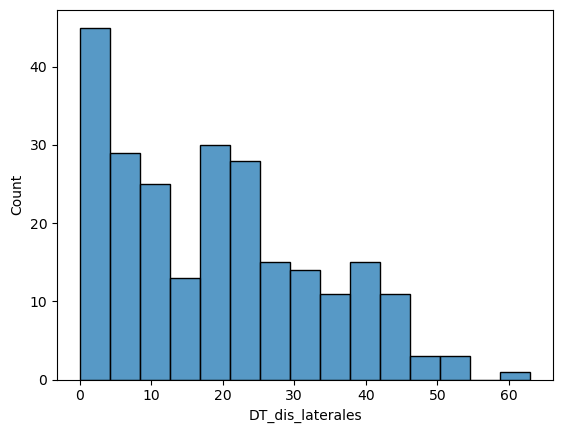

Histogram plot:  DT_dis_quadsupg


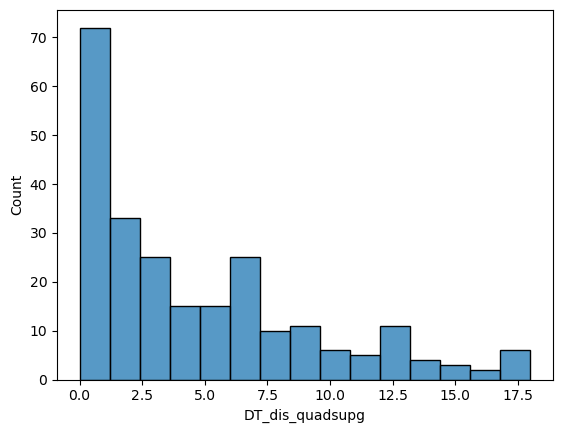

Histogram plot:  DT_dis_quadsupd


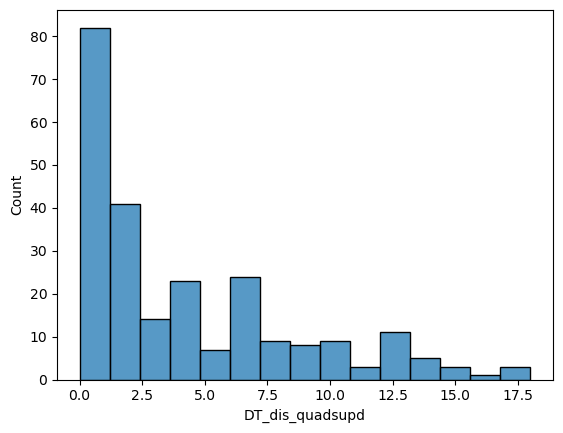

Histogram plot:  DT_dis_quadinfg


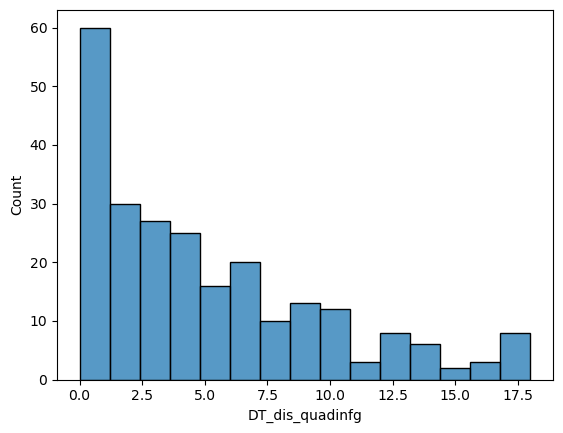

Histogram plot:  DT_dis_quadinfd


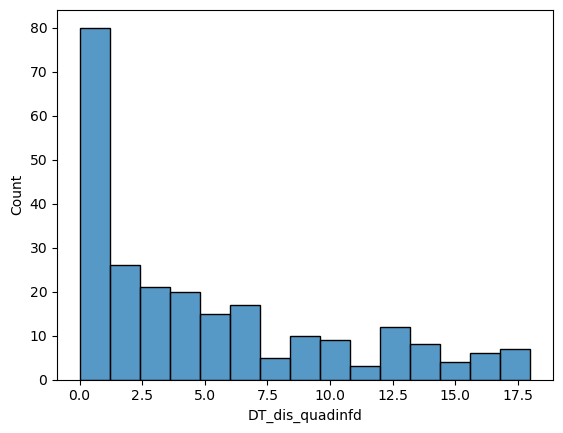

Histogram plot:  DT_dis_Gauche


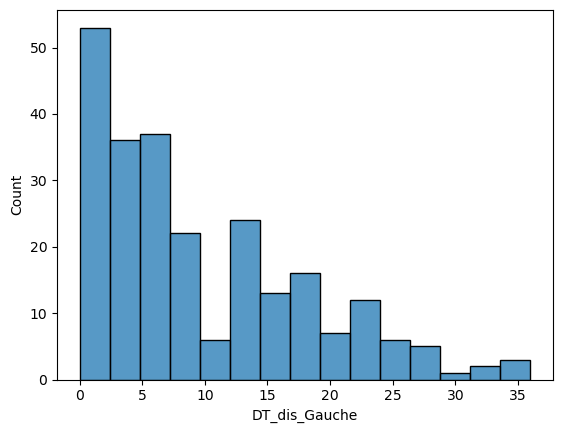

Histogram plot:  DT_dis_Droite


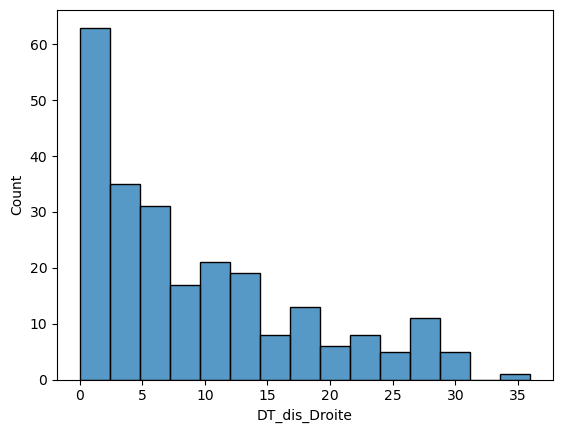

Histogram plot:  Resultat ST


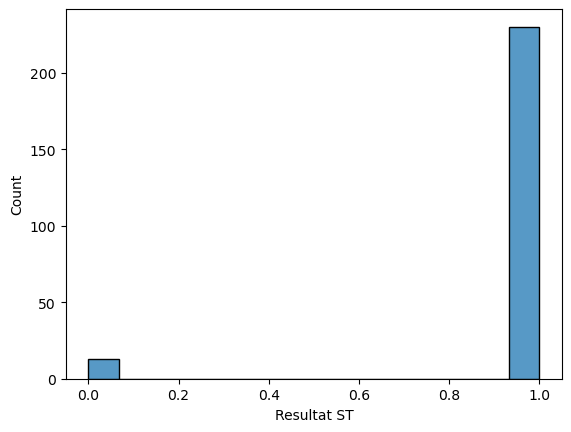

Histogram plot:  Resultat DT Central


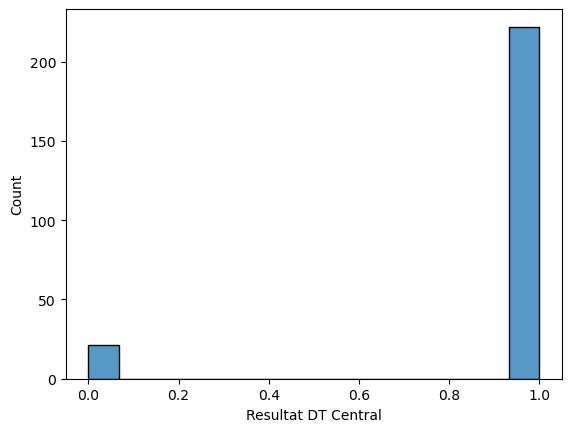

Histogram plot:  Résultat DT latéral


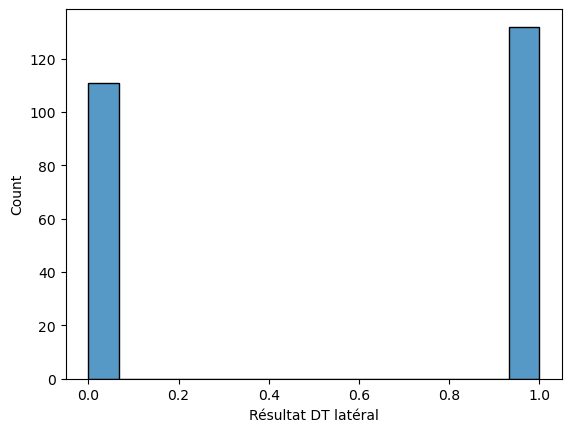

Histogram plot:  Resultat Dis_Centrale


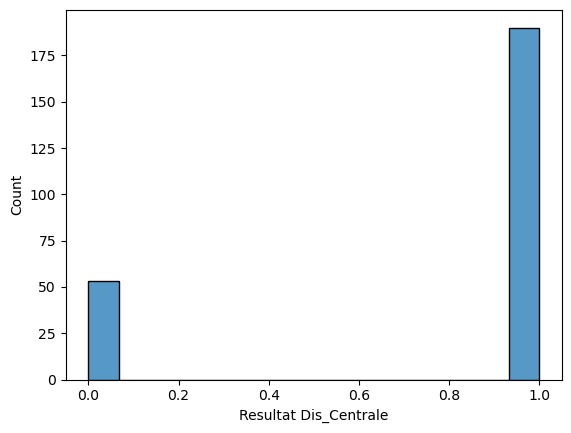

Histogram plot:  Resultat dis_laterales


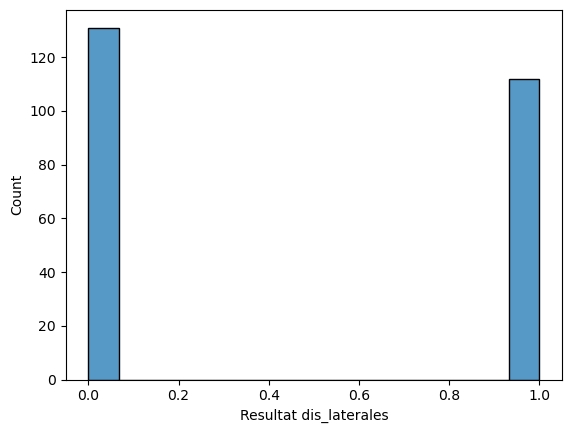

In [36]:
# Remaining Columns
rem_cols = ['DT_quadsupg', 'DT_quadsupd',
       'DT_quadinfg', 'DT_quadinfd', 'DT_Gauche', 'DT_Droite',
       'DT_dis_Centrale', 'DT_dis_laterales', 'DT_dis_quadsupg',
       'DT_dis_quadsupd', 'DT_dis_quadinfg', 'DT_dis_quadinfd',
       'DT_dis_Gauche', 'DT_dis_Droite', 'Resultat ST', 'Resultat DT Central',
       'Résultat DT latéral', 'Resultat Dis_Centrale',
       'Resultat dis_laterales']
for col in rem_cols:
    print("Histogram plot: ", col)
    sns.histplot(df[col], bins = 15)
    plt.show()

## Features Engineering

In [37]:
# Creating new dataframe called "cleaned_df" to included the cleaned version of the main dataframe/dataset
cleaned_df = pd.DataFrame()

In [38]:
# Encoding the categorical column 'Sexe' where 'F' = 0 and 'H' = 1
cleaned_df['Sexe'] = pd.get_dummies(df.Sexe, drop_first = True)

In [122]:
import joblib
# Encoding the categorical column 'Etio'
le = LabelEncoder()
cleaned_df['Etio'] = le.fit_transform(df.Etio)
joblib.dump(le, 'etio_encoder.pkl')

['etio_encoder.pkl']

In [123]:
# Encoding the categorical column 'CV'
le = LabelEncoder()
cleaned_df['CV'] = le.fit_transform(df.CV)
joblib.dump(le, 'cv_encoder.pkl')

['cv_encoder.pkl']

In [41]:
# Adding other columns from df dataframe to cleaned_df dataframe
cleaned_df['Age'] = df['Age']
cleaned_df['Esterman'] = df['Esterman']
cleaned_df['ST'] = df['ST']
cleaned_df[['DT_centrale','DT_quadsupd','DT_quadsupg','DT_quadinfg',
            'DT_quadinfd','DT_dis_Centrale','DT_dis_quadinfg',
            'DT_dis_quadinfd','DT_dis_quadsupg','DT_dis_quadsupd']] = df[['DT_centrale','DT_quadsupd','DT_quadsupg','DT_quadinfg',
            'DT_quadinfd','DT_dis_Centrale','DT_dis_quadinfg',
            'DT_dis_quadinfd','DT_dis_quadsupg','DT_dis_quadsupd']]
cleaned_df['Decision'] = df['Decision']

In [42]:
cleaned_df.columns

Index(['Sexe', 'Etio', 'CV', 'Age', 'Esterman', 'ST', 'DT_centrale',
       'DT_quadsupd', 'DT_quadsupg', 'DT_quadinfg', 'DT_quadinfd',
       'DT_dis_Centrale', 'DT_dis_quadinfg', 'DT_dis_quadinfd',
       'DT_dis_quadsupg', 'DT_dis_quadsupd', 'Decision'],
      dtype='object')

In [43]:
len(cleaned_df.columns)

17

In [44]:
# Printing the cleaned_df dataframe
cleaned_df.sample(10)

,Sexe,Etio,CV,Age,Esterman,ST,DT_centrale,DT_quadsupd,DT_quadsupg,DT_quadinfg,DT_quadinfd,DT_dis_Centrale,DT_dis_quadinfg,DT_dis_quadinfd,DT_dis_quadsupg,DT_dis_quadsupd,Decision
195,1,3,5,59,23,1,5,16,0,1,0,6,0,0.0,0,17,Non
144,1,3,2,54,1,0,1,0,2,1,0,1,4,2.0,2,3,Oui
203,1,3,6,78,18,0,3,1,9,0,0,4,10,1.0,9,2,Non
91,1,0,2,34,0,1,6,2,7,2,0,14,3,1.0,2,2,Non
111,1,3,2,74,0,1,12,0,0,0,0,7,3,1.0,0,0,Oui
42,1,3,1,57,42,1,3,0,9,5,0,5,4,0.0,18,2,Non
174,0,2,4,50,27,1,6,3,2,10,4,9,13,5.0,14,3,Non
65,1,0,2,41,0,0,2,0,0,0,0,2,1,0.0,0,0,Oui
18,1,0,0,20,40,2,2,3,0,0,13,3,7,12.0,5,10,Non
152,0,2,3,38,28,0,3,3,0,0,14,3,4,12.0,2,7,Non


In [45]:
cleaned_df.describe()

,Sexe,Etio,CV,Age,Esterman,ST,DT_centrale,DT_quadsupd,DT_quadsupg,DT_quadinfg,DT_quadinfd,DT_dis_Centrale,DT_dis_quadinfg,DT_dis_quadinfd,DT_dis_quadsupg,DT_dis_quadsupd
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,0.596708,2.312757,2.934156,49.806584,13.736626,0.679012,3.975309,2.423868,2.617284,2.473251,2.267490,4.691358,5.102881,5.028807,4.637860,4.259259
std,0.491571,1.161060,2.101698,15.575451,15.952039,0.929238,3.689303,3.602881,3.963369,4.253621,4.211168,4.356932,4.589076,4.974646,4.540967,4.315390
min,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,2.000000,38.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000
50%,1.000000,3.000000,2.000000,50.000000,8.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,3.000000,4.000000,3.000000,3.000000,2.000000
75%,1.000000,3.000000,4.000000,62.000000,23.000000,1.000000,5.000000,3.000000,3.000000,2.500000,2.000000,6.000000,8.000000,8.000000,7.000000,7.000000
max,1.000000,4.000000,8.000000,85.000000,71.000000,5.000000,23.000000,17.000000,18.000000,18.000000,18.000000,35.000000,18.000000,18.000000,18.000000,18.000000


In [46]:
# Checking the output column 'Decision' values
cleaned_df.Decision.value_counts()

Non           128
Oui            90
Simulateur     25
Name: Decision, dtype: int64

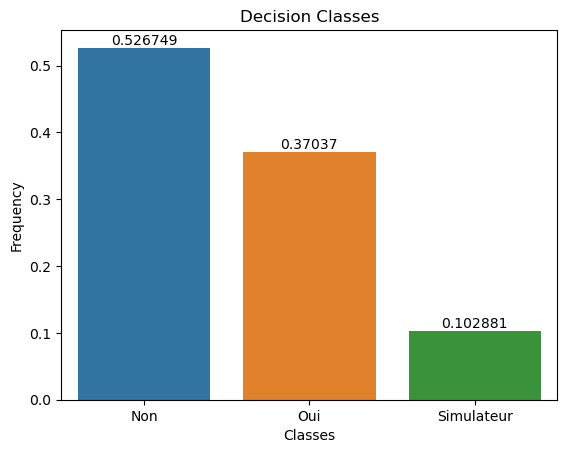

In [47]:
# Plotting target column 'Effect' percentage per class
ax = sns.barplot(x = cleaned_df['Decision'].value_counts().index, y = list(cleaned_df['Decision'].value_counts()/len(df.Decision)))
ax.bar_label(ax.containers[0])
plt.title('Decision Classes')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

In [48]:
# Encoding the output column 'Decision' as follows:
cleaned_df['Decision'] = cleaned_df['Decision'].replace({'Non': 0, 'Oui': 1, 'Simulateur': 2})

<Axes: >

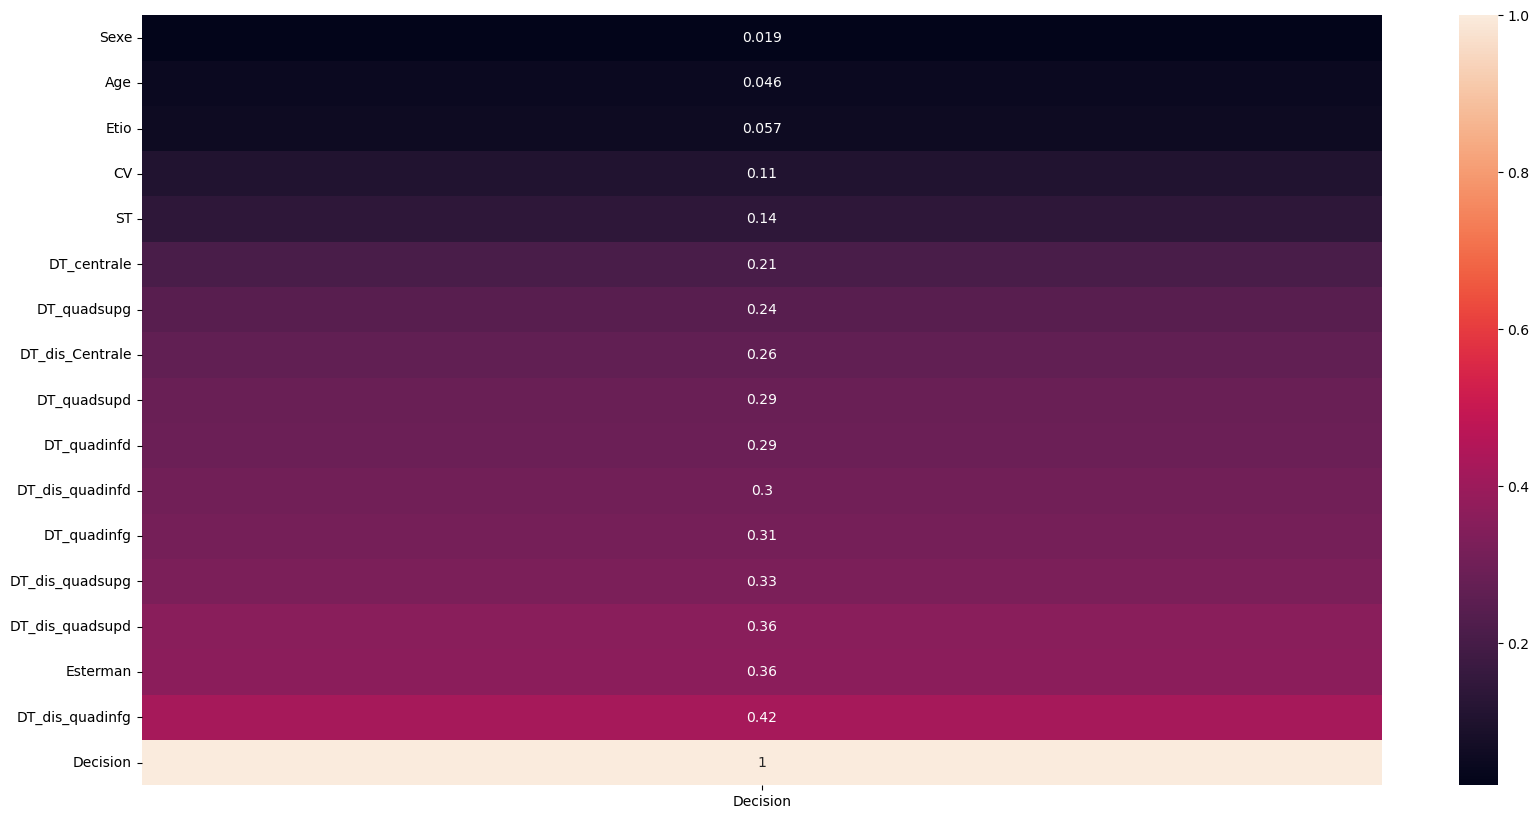

In [49]:
# Checking the correlation of the columns 
plt.figure(figsize=(20,10))
sns.heatmap(cleaned_df.corr().abs()[['Decision']].sort_values(by = 'Decision'), annot = True)

# Building ML Classifcation Models without considering oversampling techniques

In [50]:
# Defining the features and target
features = cleaned_df.drop(columns = ['Decision'])
target = cleaned_df['Decision']

In [51]:
# Splitting the data to training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.4)

## Logistic Regression

In [52]:
# Initializing the model LR
mdl_LR = LogisticRegression(max_iter = 3000)

In [53]:
# Fitting the training data to the LR model
mdl_LR.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [54]:
# Getting the intercept and coeffecients values of the LR model
mdl_LR.intercept_, mdl_LR.coef_

(array([-0.9559471 ,  2.66123847, -1.70529136]),
 array([[-0.4596501 ,  0.0167914 , -0.0099415 , -0.00521433,  0.00346898,
         -0.30082166,  0.17613426,  0.19230175,  0.04881839, -0.00460067,
          0.09178857,  0.05226397,  0.14533351,  0.04859009,  0.02175301,
         -0.01000654],
        [ 0.14006649, -0.04473079, -0.26410234,  0.01476118, -0.01817676,
          0.10173862, -0.04365852, -0.14931771,  0.04044884, -0.04654876,
          0.09075681, -0.11670365, -0.16821203, -0.09455957, -0.07383761,
         -0.05420421],
        [ 0.31958361,  0.02793939,  0.27404384, -0.00954685,  0.01470778,
          0.19908305, -0.13247574, -0.04298404, -0.08926722,  0.05114943,
         -0.18254538,  0.06443968,  0.02287851,  0.04596948,  0.05208459,
          0.06421075]]))

In [55]:
# Testing the LR model on unseen data (test data)
pred_LR = mdl_LR.predict(X_test)

In [56]:
# Accuracy score of LR model
accuracy_score(y_test, pred_LR)

0.7448979591836735

<Axes: >

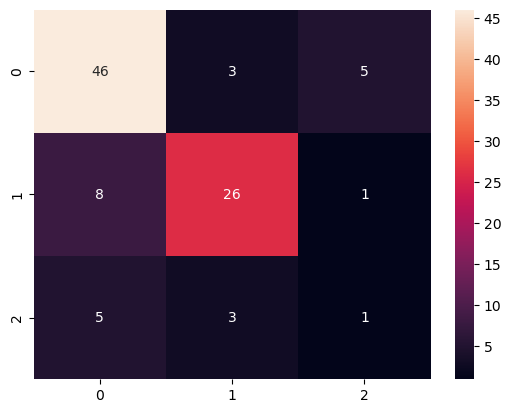

In [57]:
# Confusion matirx of the LR predictions
sns.heatmap(confusion_matrix(y_test, pred_LR), annot = True)

In [58]:
print(metrics.classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        54
           1       0.81      0.74      0.78        35
           2       0.14      0.11      0.12         9

    accuracy                           0.74        98
   macro avg       0.58      0.57      0.57        98
weighted avg       0.73      0.74      0.74        98



## Decision Tree Classifier

In [59]:
# Intializing the decision tree classifier model
mdl_DT = DecisionTreeClassifier(criterion='entropy')

In [60]:
# Fitting the training data to the DT model
mdl_DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [61]:
# Testing the DT model on unseen data (test data)
pred_DT = mdl_DT.predict(X_test)

In [62]:
# Accuracy score of DT model
accuracy_score(y_test, pred_DT)

0.6530612244897959

<Axes: >

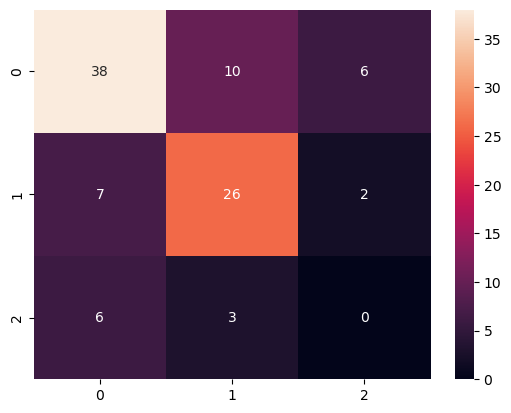

In [63]:
# Confusion matirx of the DT predictions
sns.heatmap(confusion_matrix(y_test, pred_DT), annot = True)

In [64]:
print(metrics.classification_report(y_test, pred_DT))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72        54
           1       0.67      0.74      0.70        35
           2       0.00      0.00      0.00         9

    accuracy                           0.65        98
   macro avg       0.47      0.48      0.48        98
weighted avg       0.65      0.65      0.65        98



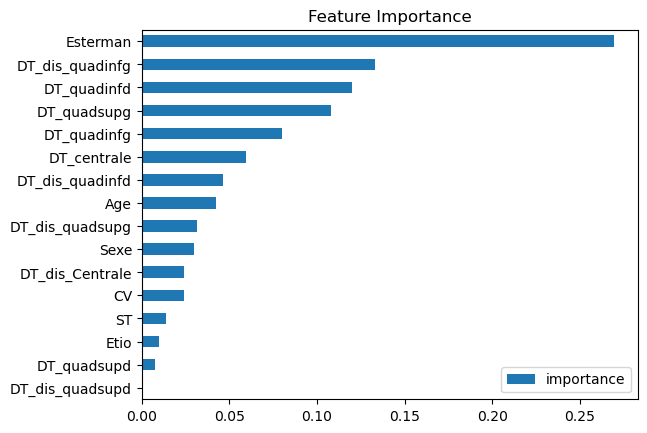

In [65]:
# Getting and plotting feature importance
features_importance = pd.DataFrame(data = mdl_DT.feature_importances_,
             index = mdl_DT.feature_names_in_,
             columns = ['importance'])
features_importance.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

## XGBOOST

In [66]:
clf_xgb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,max_depth=3, random_state=0)

In [67]:
clf_xgb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [68]:
y_pred_xgb = clf_xgb.predict(X_test)

In [69]:
accuracy_score(y_test, y_pred_xgb)

0.7346938775510204

<Axes: >

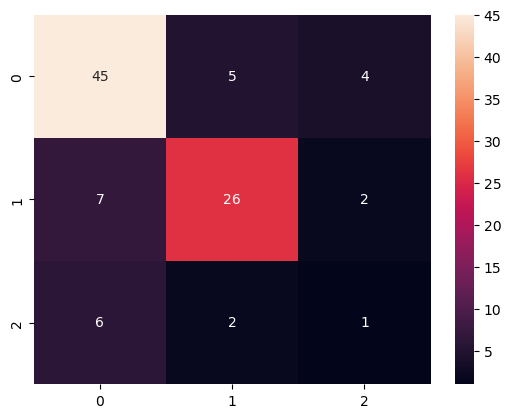

In [70]:
# Confusion matirx of the XGB predictions
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot = True)

In [71]:
print(metrics.classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80        54
           1       0.79      0.74      0.76        35
           2       0.14      0.11      0.12         9

    accuracy                           0.73        98
   macro avg       0.57      0.56      0.56        98
weighted avg       0.72      0.73      0.73        98



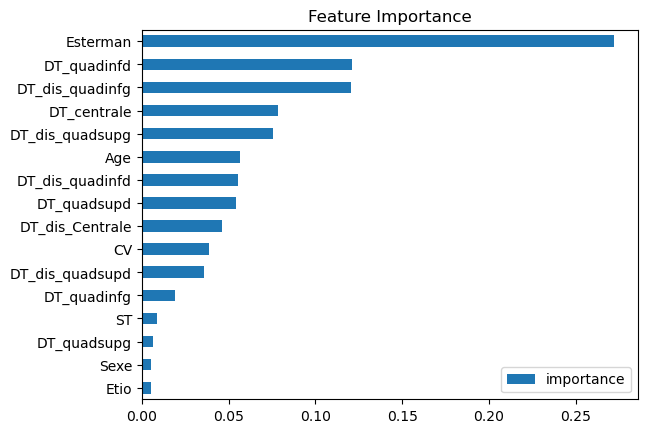

In [72]:
# Getting and plotting feature importance
features_importance = pd.DataFrame(data = clf_xgb.feature_importances_,
             index = clf_xgb.feature_names_in_,
             columns = ['importance'])
features_importance.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

## SVM

In [73]:
# Create and train the SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0)
svm_classifier.fit(X_train, y_train)

SVC()

In [74]:
# Testing the SVM model on unseen data (test data)
pred_SVM = svm_classifier.predict(X_test)

In [75]:
accuracy_score(y_test, pred_SVM)

0.7857142857142857

<Axes: >

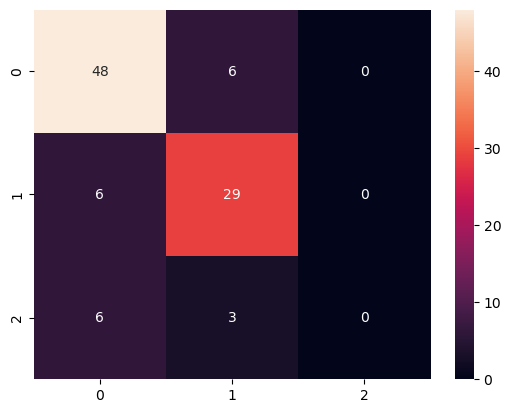

In [76]:
# Confusion matirx of the XGB predictions
sns.heatmap(confusion_matrix(y_test, pred_SVM), annot = True)

In [77]:
print(metrics.classification_report(y_test, pred_SVM, zero_division=0))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        54
           1       0.76      0.83      0.79        35
           2       0.00      0.00      0.00         9

    accuracy                           0.79        98
   macro avg       0.52      0.57      0.55        98
weighted avg       0.71      0.79      0.75        98



## KFOLD CROSS VALIDATION

In [78]:
def KFold_cv(model_):
    
    kf = KFold(n_splits = 5, shuffle = True)
    
    for train, test in kf.split(cleaned_df):

        train_df = cleaned_df.loc[train]
        test_df = cleaned_df.loc[test]
        

        model_.fit(train_df[list(features.columns)], train_df['Decision'])


        y_predictions = model_.predict(test_df[list(features.columns)])

        print(metrics.classification_report(test_df['Decision'], y_predictions, zero_division=0))

In [79]:
#Cross Validation Score

# Initializing the model LR
mdl_LR = LogisticRegression(max_iter = 3000)

# Intializing the decision tree classifier model
mdl_DT = DecisionTreeClassifier(criterion='entropy')

# Intializing the XGBoost classifier model
clf_xgb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,max_depth=3, random_state=0)

# Create and train the SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0)

list_models = [mdl_LR, mdl_DT, clf_xgb, svm_classifier]

for mdl in list_models:
    print("========================================")
    print("MODEL == > ", mdl )
    KFold_cv(mdl)
    print("========================================")

MODEL == >  LogisticRegression(max_iter=3000)
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        26
           1       0.76      0.86      0.81        22
           2       0.00      0.00      0.00         1

    accuracy                           0.80        49
   macro avg       0.54      0.54      0.54        49
weighted avg       0.80      0.80      0.80        49



              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.60      0.86      0.71        14
           2       0.00      0.00      0.00         5

    accuracy                           0.69        49
   macro avg       0.46      0.53      0.49        49
weighted avg       0.65      0.69      0.67        49

              precision    recall  f1-score   support

           0       0.68      0.71      0.69        24
           1       0.75      0.71      0.73        21
           2       0.25      0.25      0.25         4

    accuracy                           0.67        49
   macro avg       0.56      0.56      0.56        49
weighted avg       0.67      0.67      0.67        49

              precision    recall  f1-score   support

           0       0.67      0.88      0.76        25
           1       0.67      0.77      0.71        13
           2       0.00      0.00      0.00        10

    accuracy        

# Building ML Classifcation Models with SMOTE technique

In [80]:
len(X_train), len(y_train), len(X_test), len(y_test)

(145, 145, 98, 98)

In [81]:

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(features, target)

print("Resampled class distribution:", Counter(y_resampled))

Resampled class distribution: Counter({0: 128, 1: 128, 2: 128})


In [82]:
X_resampled.describe()

,Sexe,Etio,CV,Age,Esterman,ST,DT_centrale,DT_quadsupd,DT_quadsupg,DT_quadinfg,DT_quadinfd,DT_dis_Centrale,DT_dis_quadinfg,DT_dis_quadinfd,DT_dis_quadsupg,DT_dis_quadsupd
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.00000,384.000000
mean,0.520833,2.203125,3.127604,49.341146,11.807292,0.580729,3.406250,2.070312,2.192708,1.773438,1.695312,4.093750,4.125000,4.581103,4.09375,3.661458
std,0.500218,1.145038,1.972889,14.824148,14.227335,0.819949,3.198655,3.207816,3.501488,3.564141,3.573675,3.763444,4.043497,4.392719,4.16081,3.786050
min,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,2.000000,2.000000,38.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.00000,1.000000
50%,1.000000,3.000000,2.000000,50.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,3.000000,3.000000,3.007175,3.00000,2.000000
75%,1.000000,3.000000,5.000000,61.000000,18.000000,1.000000,4.000000,3.000000,3.000000,2.000000,1.000000,5.000000,6.000000,6.572504,6.00000,6.000000
max,1.000000,4.000000,8.000000,85.000000,71.000000,5.000000,23.000000,17.000000,18.000000,18.000000,18.000000,35.000000,18.000000,18.000000,18.00000,18.000000


In [83]:
# Utiliser get_dummies pour le one-hot encoding de la colonne binaire
X_resampled_n = pd.get_dummies(X_resampled, columns=['Sexe'], prefix=['Sexe'])

In [84]:
X_resampled_n.dtypes

Etio                 int32
CV                   int32
Age                  int64
Esterman             int64
ST                   int64
DT_centrale          int64
DT_quadsupd          int64
DT_quadsupg          int64
DT_quadinfg          int64
DT_quadinfd          int64
DT_dis_Centrale      int64
DT_dis_quadinfg      int64
DT_dis_quadinfd    float64
DT_dis_quadsupg      int64
DT_dis_quadsupd      int64
Sexe_0               uint8
Sexe_1               uint8
dtype: object

In [85]:
X_resampled_n.describe()

,Etio,CV,Age,Esterman,ST,DT_centrale,DT_quadsupd,DT_quadsupg,DT_quadinfg,DT_quadinfd,DT_dis_Centrale,DT_dis_quadinfg,DT_dis_quadinfd,DT_dis_quadsupg,DT_dis_quadsupd,Sexe_0,Sexe_1
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.00000,384.000000,384.000000,384.000000
mean,2.203125,3.127604,49.341146,11.807292,0.580729,3.406250,2.070312,2.192708,1.773438,1.695312,4.093750,4.125000,4.581103,4.09375,3.661458,0.479167,0.520833
std,1.145038,1.972889,14.824148,14.227335,0.819949,3.198655,3.207816,3.501488,3.564141,3.573675,3.763444,4.043497,4.392719,4.16081,3.786050,0.500218,0.500218
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,38.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000
50%,3.000000,2.000000,50.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,3.000000,3.000000,3.007175,3.00000,2.000000,0.000000,1.000000
75%,3.000000,5.000000,61.000000,18.000000,1.000000,4.000000,3.000000,3.000000,2.000000,1.000000,5.000000,6.000000,6.572504,6.00000,6.000000,1.000000,1.000000
max,4.000000,8.000000,85.000000,71.000000,5.000000,23.000000,17.000000,18.000000,18.000000,18.000000,35.000000,18.000000,18.000000,18.00000,18.000000,1.000000,1.000000


In [86]:
# Splitting the data to training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_n, y_resampled, test_size = 0.3)

In [87]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Initialiser le MinMaxScaler
scaler = MinMaxScaler()

# Normaliser les colonnes du DataFrame
X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)


In [88]:
X_train_normalized.describe()

,Etio,CV,Age,Esterman,ST,DT_centrale,DT_quadsupd,DT_quadsupg,DT_quadinfg,DT_quadinfd,DT_dis_Centrale,DT_dis_quadinfg,DT_dis_quadinfd,DT_dis_quadsupg,DT_dis_quadsupd,Sexe_0,Sexe_1
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,0.716418,0.385728,0.466251,0.175741,0.117164,0.146820,0.122915,0.139511,0.099088,0.100954,0.118550,0.226575,0.264988,0.233209,0.211809,0.503731,0.496269
std,0.383834,0.248005,0.225218,0.208724,0.168281,0.133650,0.186707,0.217356,0.196476,0.206700,0.110283,0.221893,0.248668,0.235470,0.208184,0.500922,0.500922
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.666667,0.250000,0.294776,0.014085,0.000000,0.086957,0.000000,0.000000,0.000000,0.000000,0.057143,0.055556,0.055556,0.055556,0.058824,0.000000,0.000000
50%,1.000000,0.250000,0.477612,0.098592,0.000000,0.130435,0.058824,0.055556,0.000000,0.000000,0.085714,0.166667,0.171859,0.166667,0.117647,1.000000,0.000000
75%,1.000000,0.625000,0.630597,0.260563,0.200000,0.173913,0.176471,0.166667,0.111111,0.055556,0.142857,0.333333,0.388889,0.333333,0.352941,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
X_train_normalized

,Etio,CV,Age,Esterman,ST,DT_centrale,DT_quadsupd,DT_quadsupg,DT_quadinfg,DT_quadinfd,DT_dis_Centrale,DT_dis_quadinfg,DT_dis_quadinfd,DT_dis_quadsupg,DT_dis_quadsupd,Sexe_0,Sexe_1
0,0.333333,0.500,0.149254,0.154930,0.0,0.086957,0.000000,0.166667,0.000000,0.055556,0.142857,0.166667,0.385080,0.111111,0.117647,1.0,0.0
1,0.666667,0.250,0.492537,0.042254,0.0,0.217391,0.000000,0.055556,0.000000,0.000000,0.085714,0.166667,0.417808,0.111111,0.176471,0.0,1.0
2,0.666667,0.250,0.313433,0.014085,0.2,0.478261,0.117647,0.111111,0.055556,0.000000,0.085714,0.166667,0.000000,0.055556,0.058824,0.0,1.0
3,0.000000,0.000,0.029851,0.563380,0.4,0.086957,0.176471,0.000000,0.000000,0.722222,0.085714,0.388889,0.666667,0.277778,0.588235,0.0,1.0
4,1.000000,0.000,0.716418,0.633803,0.2,0.086957,0.705882,0.166667,0.111111,0.777778,0.142857,0.666667,0.777778,0.111111,0.705882,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,1.000000,0.500,0.417910,0.070423,0.0,0.086957,0.000000,0.000000,0.055556,0.055556,0.171429,0.055556,0.144624,0.166667,0.117647,0.0,1.0
264,0.666667,0.250,0.014925,0.000000,0.6,0.347826,0.235294,0.166667,0.222222,0.111111,0.228571,0.055556,0.111111,0.000000,0.117647,0.0,1.0
265,1.000000,0.000,0.283582,0.563380,0.2,0.043478,0.470588,0.055556,0.000000,0.555556,0.085714,0.333333,0.555556,0.111111,0.647059,0.0,1.0
266,0.333333,0.625,0.298507,0.169014,0.0,0.043478,0.294118,0.055556,0.055556,0.000000,0.142857,0.166667,0.222222,0.166667,0.352941,1.0,0.0


## Logistic Regression

In [90]:
# Créer le modèle de régression logistique avec gestion des poids des classes
mdl_LR_2 = LogisticRegression(max_iter=3000, class_weight='balanced')

In [91]:
# Fitting the training data to the LR model
mdl_LR_2.fit(X_train_normalized, y_train)

LogisticRegression(class_weight='balanced', max_iter=3000)

In [92]:
# Getting the intercept and coeffecients values of the LR model
mdl_LR_2.intercept_, mdl_LR_2.coef_

(array([-2.15165915,  2.27513218, -0.12347304]),
 array([[ 0.36139631,  0.05090043, -0.10889116,  0.02261899,  0.70477833,
          0.81880897,  0.88159626,  1.52489217,  0.82335425,  1.06000668,
          0.92692179,  1.98060164,  0.58459596,  0.60717049,  1.72397293,
         -0.21936381,  0.21868451],
        [ 0.00536016, -1.10690723, -0.37205817, -0.26794743, -0.93935881,
         -0.58114053, -1.07157257, -0.82547895, -0.57557963, -0.04440128,
         -0.93529042, -1.20667311, -1.78824101, -0.96084113, -1.50269927,
          0.00330806, -0.00383365],
        [-0.36675647,  1.0560068 ,  0.48094933,  0.24532844,  0.23458047,
         -0.23766844,  0.18997631, -0.69941323, -0.24777462, -1.0156054 ,
          0.00836863, -0.77392853,  1.20364505,  0.35367064, -0.22127366,
          0.21605575, -0.21485085]]))

In [93]:
# Normaliser les colonnes du DataFrame
X_test_normalized = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)


In [94]:
# Testing the LR model on unseen data (test data)
pred_LR = mdl_LR_2.predict(X_test_normalized)

In [95]:
# Accuracy score of LR model
accuracy_score(y_test, pred_LR)

0.7327586206896551

In [96]:
len(y_test), len(pred_LR)

(116, 116)

<Axes: >

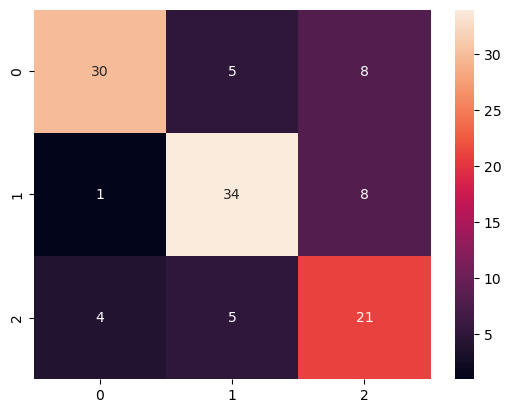

In [97]:
# Confusion matirx of the LR predictions
sns.heatmap(confusion_matrix(y_test, pred_LR), annot = True)

In [98]:
print(metrics.classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.86      0.70      0.77        43
           1       0.77      0.79      0.78        43
           2       0.57      0.70      0.63        30

    accuracy                           0.73       116
   macro avg       0.73      0.73      0.73       116
weighted avg       0.75      0.73      0.74       116



In [99]:
from sklearn.metrics import mean_squared_error

# y_true : les vraies valeurs
# y_pred : les prédictions du modèle
rmse = np.sqrt(mean_squared_error(y_test, pred_LR))
print("RMSE:", rmse)

RMSE: 0.7599909255356617


# Decision Tree Classifier 

In [100]:
# Intializing the decision tree classifier model
mdl_DT_2 = DecisionTreeClassifier(criterion='entropy')

In [101]:
# Fitting the training data to the DT model
mdl_DT_2.fit(X_train_normalized, y_train)

DecisionTreeClassifier(criterion='entropy')

In [102]:
# Testing the DT model on unseen data (test data)
pred_DT = mdl_DT_2.predict(X_test_normalized)

In [103]:
# Accuracy score of DT model
accuracy_score(y_test, pred_DT)

0.5775862068965517

<Axes: >

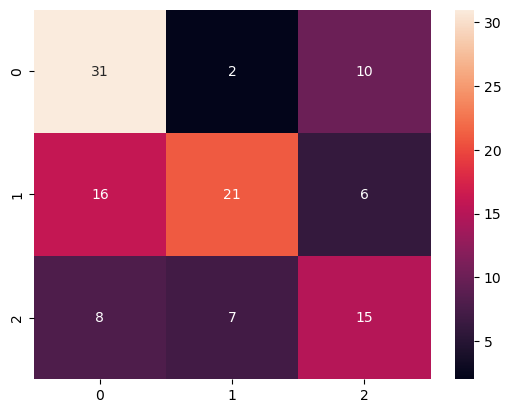

In [104]:
# Confusion matirx of the DT predictions
sns.heatmap(confusion_matrix(y_test, pred_DT), annot = True)

In [105]:
print(metrics.classification_report(y_test, pred_DT))

              precision    recall  f1-score   support

           0       0.56      0.72      0.63        43
           1       0.70      0.49      0.58        43
           2       0.48      0.50      0.49        30

    accuracy                           0.58       116
   macro avg       0.58      0.57      0.57       116
weighted avg       0.59      0.58      0.57       116



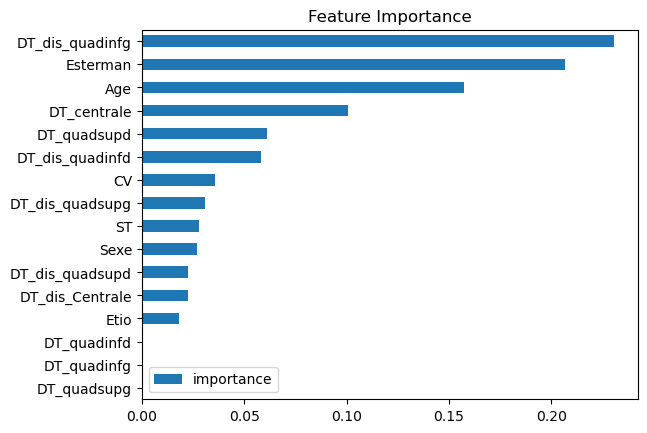

In [106]:
# Getting and plotting feature importance
features_importance = pd.DataFrame(data = mdl_DT.feature_importances_,
             index = mdl_DT.feature_names_in_,
             columns = ['importance'])
features_importance.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [107]:
from sklearn.metrics import mean_squared_error

# y_true : les vraies valeurs
# y_pred : les prédictions du modèle
rmse = np.sqrt(mean_squared_error(y_test, pred_DT))
print("RMSE:", rmse)

RMSE: 0.9423009256510144


## XGBOOST

In [108]:
clf_xgb_2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,max_depth=3, random_state=0)

In [109]:
clf_xgb_2.fit(X_train_normalized, y_train)

GradientBoostingClassifier(random_state=0)

In [110]:
y_pred_xgb = clf_xgb_2.predict(X_test_normalized)

In [111]:
accuracy_score(y_test, y_pred_xgb)

0.7327586206896551

In [112]:
print(metrics.classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        43
           1       0.82      0.77      0.80        43
           2       0.60      0.70      0.65        30

    accuracy                           0.73       116
   macro avg       0.73      0.73      0.73       116
weighted avg       0.74      0.73      0.74       116



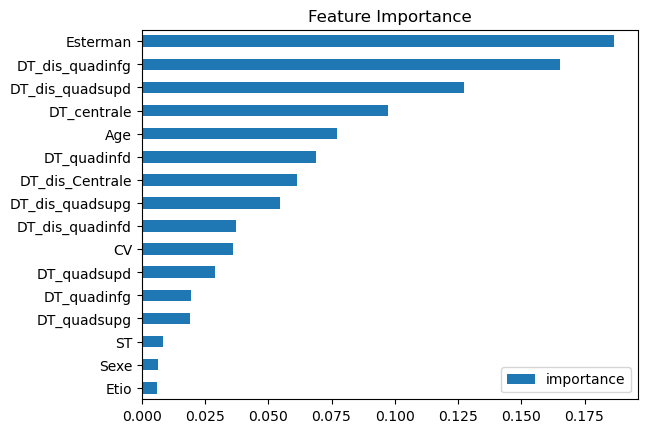

In [113]:
# Getting and plotting feature importance
features_importance = pd.DataFrame(data = clf_xgb.feature_importances_,
             index = clf_xgb.feature_names_in_,
             columns = ['importance'])
features_importance.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [114]:
from sklearn.metrics import mean_squared_error

# y_true : les vraies valeurs
# y_pred : les prédictions du modèle
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print("RMSE:", rmse)

RMSE: 0.7932908324363683


## SVM

In [126]:
# Create and train the SVM classifier
svm_classifier_2 = SVC(kernel='rbf', C=1.0)
svm_classifier_2.fit(X_train, y_train)
#

SVC()

In [131]:
X_train

,Etio,CV,Age,Esterman,ST,DT_centrale,DT_quadsupd,DT_quadsupg,DT_quadinfg,DT_quadinfd,DT_dis_Centrale,DT_dis_quadinfg,DT_dis_quadinfd,DT_dis_quadsupg,DT_dis_quadsupd,Sexe_0,Sexe_1
331,1,4,28,11,0,2,0,3,0,1,5,3,6.931434,2,2,1,0
360,2,2,51,3,0,5,0,1,0,0,3,3,7.520539,2,3,0,1
58,2,2,39,1,1,11,2,2,1,0,3,3,0.000000,1,1,0,1
18,0,0,20,40,2,2,3,0,0,13,3,7,12.000000,5,10,0,1
10,3,0,66,45,1,2,12,3,2,14,5,12,14.000000,2,12,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,3,4,46,5,0,2,0,0,1,1,6,1,2.603230,3,2,0,1
127,2,2,19,0,3,8,4,3,4,2,8,1,2.000000,0,2,0,1
3,3,0,37,40,1,1,8,1,0,10,3,6,10.000000,2,11,0,1
287,1,5,38,12,0,1,5,1,1,0,5,3,4.000000,3,6,1,0


In [130]:
# Testing the SVM model on unseen data (test data)
pred_SVM = svm_classifier_2.predict(X_test)

import joblib
joblib.dump(svm_classifier_2, 'model.pkl')
# Entraînez d'abord votre modèle
# ...

# Ensuite, sauvegardez-le



['model.pkl']

In [128]:
accuracy_score(y_test, pred_SVM)

0.75

<Axes: >

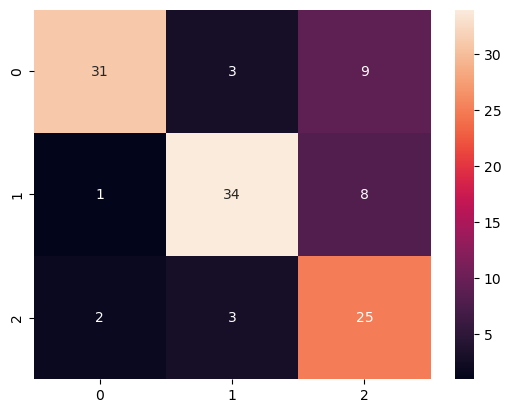

In [118]:
# Confusion matirx of the XGB predictions
sns.heatmap(confusion_matrix(y_test, pred_SVM), annot = True)

In [119]:
print(metrics.classification_report(y_test, pred_SVM, zero_division=0))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81        43
           1       0.85      0.79      0.82        43
           2       0.60      0.83      0.69        30

    accuracy                           0.78       116
   macro avg       0.79      0.78      0.77       116
weighted avg       0.81      0.78      0.78       116



In [120]:
from sklearn.metrics import mean_squared_error

# y_true : les vraies valeurs
# y_pred : les prédictions du modèle
rmse = np.sqrt(mean_squared_error(y_test, pred_SVM))
print("RMSE:", rmse)

RMSE: 0.7131764786188426
